In [1]:
import skbeam.core.roi as roi 
import skbeam.core.correlation as corr
import skbeam.core.utils as utils
import skbeam.core.mask as mask

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import LogNorm

In [2]:
num_levels = 3
num_bufs = 8  # must be even
xdim = 200
ydim = 200
stack_size = 500
img_stack = np.random.randint(1, 10, (stack_size, xdim, ydim))
rois = np.zeros_like(img_stack[0])
# make sure that the ROIs can be any integers greater than 1. They do not
# have to start at 1 and be continuous
rois[0:xdim//10, 0:ydim//10] = 5
rois[xdim//10:xdim//5, ydim//10:ydim//5] = 3

In [3]:
#rois

In [4]:
g2, lag_steps = corr.multi_tau_auto_corr(num_levels, num_bufs,
                                        rois, img_stack)

In [5]:
bad_list = [4, 6, 167, 200, 456]

In [6]:
imgs = mask.bad_to_nan_gen(img_stack, bad_list)

In [7]:
imgs

<generator object bad_to_nan_gen at 0x106d265f0>

In [8]:
images = []
for result in imgs:
    images.append(result)

In [9]:
num_levels, num_bufs, np.asarray(images).shape

(3, 8, (500, 200, 200))

In [10]:
g2_n, lag_steps_n = corr.multi_tau_auto_corr(num_levels, num_bufs,
                                        rois, np.asarray(images))

In [11]:
g2.shape, g2_n.shape

((16, 2), (16, 2))

In [12]:
g2_n

array([[ 1.26612326,  1.26733327],
       [ 0.99989991,  1.00059554],
       [ 1.00007772,  1.00085285],
       [ 0.99948876,  1.00049869],
       [ 0.99930778,  0.99988689],
       [ 1.00061323,  1.00034901],
       [ 0.99973492,  1.00035967],
       [ 1.00068439,  1.00042408],
       [ 1.00019778,  1.00024086],
       [ 1.0003177 ,  0.99967533],
       [ 0.99946801,  0.99962781],
       [ 1.00056269,  1.00038933],
       [ 1.00005463,  1.00053529],
       [ 0.99990029,  0.99943365],
       [ 1.00009662,  1.00025492],
       [ 0.99974793,  0.99974887]])

In [13]:
ty = 20
for i in range(4):
    ty -=1
    print ty

19
18
17
16


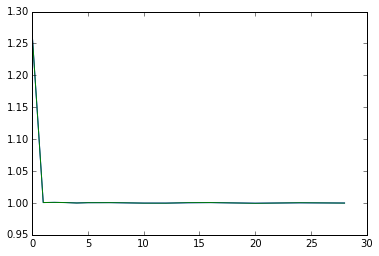

In [14]:
plt.plot(lag_steps, g2[:, 1], "b")
plt.plot(lag_steps, g2_n[:,1], "g")
plt.show()

In [39]:
num_levels = 5
num_bufs = 8  # must be even
xdim = 256
ydim = 512
stack_size = 100
img_stack = np.random.randint(1, 3, (stack_size, xdim, ydim))
rois = np.zeros_like(img_stack[0])
# make sure that the ROIs can be any integers greater than 1.
# They do not have to start at 1 and be continuous
rois[0:xdim//10, 0:ydim//10] = 5
rois[xdim//10:xdim//5, ydim//10:ydim//5] = 3

In [40]:
g21, lag_steps = corr.multi_tau_auto_corr(num_levels, num_bufs,
                                        rois, img_stack)
bad_img_list = [3, 21, 35, 48]

images = mask.bad_to_nan_gen(img_stack, bad_img_list)


In [41]:
g2_n1, lag_steps_n = corr.multi_tau_auto_corr(num_levels, num_bufs,
                                            rois, images)


In [42]:
g2_n1.shape, g21.shape

((20, 2), (22, 2))

In [37]:
g21[:, 0] , g2_n1[:,0]

(array([ 1.11115801,  1.00009481,  0.99959973,  1.00014344,  1.00009953,
         0.99912858,  1.00019436,  1.00012077,  0.99983236,  0.99998322,
         1.00024383,  1.00007792,  0.99986022,  0.9997441 ,  1.00035408,
         0.99982425,  0.99990374,  0.99989068,  0.99990919,  1.00040644]),
 array([ 1.11110296,  1.0001509 ,  0.99956636,  1.00020511,  1.00017121,
         0.99896253,  1.00039697,  0.99996688,  0.99978717,  1.00009735,
         1.00020375,  1.00015226,  0.99970007,  0.99966969,  1.00044719,
         0.99998663,  1.00002784,  0.99979099,  1.00021176,  0.99993807]))

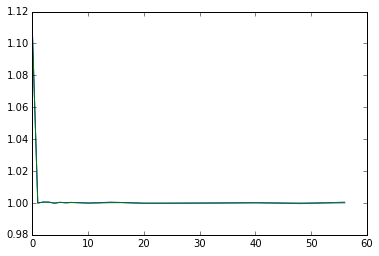

In [38]:
plt.plot(lag_steps, g21[:, 1], "b")
plt.plot(lag_steps, g2_n1[:,1], "g")
plt.show()

In [21]:
from numpy.testing import assert_array_almost_equal
assert_array_almost_equal(g2[:, 1], g2_n[:,1], decimal=4)